<a href="https://colab.research.google.com/github/wailokkwok/image-classification-using-custom-data/blob/main/Image_Classification_with_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount("/content/drive", force_remount = True)



Mounted at /content/drive


In [ ]:
data_dir = pathlib.Path('/content/drive/My Drive/Colab Notebooks/flower_photo/') 
data_dir = pathlib.Path(data_dir)
print(data_dir)


/content/drive/My Drive/Colab Notebooks/flower_photo


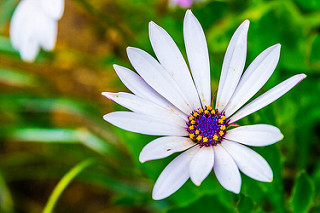

In [ ]:
daisy_list = list(data_dir.glob("daisy/*"))
PIL.Image.open(daisy_list[1])

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1072 files belonging to 2 classes.
Using 858 files for training.
Found 1072 files belonging to 2 classes.
Using 214 files for validation.


7


In [ ]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9950219


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/10
27/27 [==============================] - 75s 3s/step - loss: 0.8203 - accuracy: 0.5804 - val_loss: 0.6306 - val_accuracy: 0.6355
Epoch 2/10
27/27 [==============================] - 21s 749ms/step - loss: 0.5745 - accuracy: 0.7214 - val_loss: 0.5911 - val_accuracy: 0.7009
Epoch 3/10
27/27 [==============================] - 21s 748ms/step - loss: 0.5307 - accuracy: 0.7517 - val_loss: 0.6017 - val_accuracy: 0.6729
Epoch 4/10
27/27 [==============================] - 21s 749ms/step - loss: 0.4636 - accuracy: 0.7879 - val_loss: 0.4336 - val_accuracy: 0.8084
Epoch 5/10
27/27 [==============================] - 21s 748ms/step - loss: 0.3883 - accuracy: 0.8392 - val_loss: 0.5256 - val_accuracy: 0.7617
Epoch 6/10
27/27 [==============================] - 22s 787ms/step - loss: 0.3739 - accuracy: 0.8438 - val_loss: 0.4201 - val_accuracy: 0.8037
Epoch 7/10
27/27 [==============================] - 21s 747ms/step - loss: 0.3424 - accuracy: 0.8590 - val_loss: 0.3938 - val_accuracy: 0.8271
Ep